# Исследовательский анализ данных рекламного бюджета компании 

### Введение

**Цель:** анализ полученных датасетов, с целью выявления негативных явлений, влияющий на качество привлечения новых пользователей в приложение с последующей выроботкой рекомендаций по их устранению.   

**Объекты:** 'visits_info_short.csv', 'orders_info_short.csv', 'costs_info_short.csv'.   

**Задачи:**   
Узнать:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

**Этапы:**
* Загрузка данных;  
* Преобработка данных (выявление пропусков, дубликатов и.т.д.);  
* Анализ полученных данных с использованием ранее изученных функций;  
* Визуализация полученных закономерностей;  
* Формулирование выводов и рекомендаций;  

### Загрузка и предобработка данных

#### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
try:
    visits, orders, costs = (
    pd.read_csv('visits_info_short.csv'),  
    pd.read_csv('orders_info_short.csv'),
    pd.read_csv('costs_info_short.csv'))
except:
    visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'), 
    pd.read_csv('/datasets/orders_info_short.csv'), 
    pd.read_csv('/datasets/costs_info_short.csv')  
    )

#### Предобработка данных

In [3]:
for i in (visits, orders, costs):
    print(i.info()) # получение общей информации
    i.columns=i.columns.str.lower() # приведение к нижнему регистру
    display(i.head()) #Открываем первые строки файла
    print("Количество дубликатов в файле =", i.duplicated().sum()) # проверка на дубликаты
    print("Количество пропусков в файле =", sum(i.isna().sum())) # проверка на пропуски
    print()
    print()
    print()
    
for col in [visits, orders]:
    col.columns = [i.lower().replace(' ', '_') for i in col.columns.values] #Переименовываем столбцы 

visits['session_start'] = pd.to_datetime(visits['session_start']) # Приводим столбцы к нужному типу
visits['session_end'] = pd.to_datetime(visits['session_end']) 
orders['event_dt'] = pd.to_datetime(orders['event_dt']) 
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None


,user id,region,device,channel,session start,session end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Количество дубликатов в файле = 0
Количество пропусков в файле = 0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None


,user id,event dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Количество дубликатов в файле = 0
Количество пропусков в файле = 0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Количество дубликатов в файле = 0
Количество пропусков в файле = 0





**Вывод №0:** в данных присутствовали: не верный тип данных, отсутствие приведения к змеиному регистру.  
Над данными были проведены следующие действия: 
1. Столбцы с датой и временем были приведены к нужному типу;
2. Названия столбцов были приведены к змеиному регистру.  

Пропуски и дубликаты не найдены. 

### Функции для расчетов

In [4]:
# Задаем функции для дальнейшего анализа

# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [5]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [6]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [7]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [8]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [9]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [10]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [11]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

#### Составление профилей пользователей


In [12]:
profiles = get_profiles(visits, orders, costs) # Составляем профили пользователей
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


#### Определение минимальной и максимальной даты привлечения пользователей

In [13]:
print('Минимальная дата привлечения пользователей -', profiles['first_ts'].min()) #Определеяем минимальную дату привлечения
print('Максимальная дата привлечения пользователей -', profiles['first_ts'].max()) #Определеяем максимальную дату привлечения

Минимальная дата привлечения пользователей - 2019-05-01 00:00:41
Максимальная дата привлечения пользователей - 2019-10-27 23:59:04


**Вывод №1:** основной промежуток привлечения клиентов представленных в данном исследовании находится в пределах от 2019-05-01 00:00:41 до 2019-10-27 23:59:04. Этих данных достаточно для проведения исследования.

#### Анализ пользователей по странам
#### Анализ пользователей по устройствам
#### Анализ пользователей по рекламным источникам

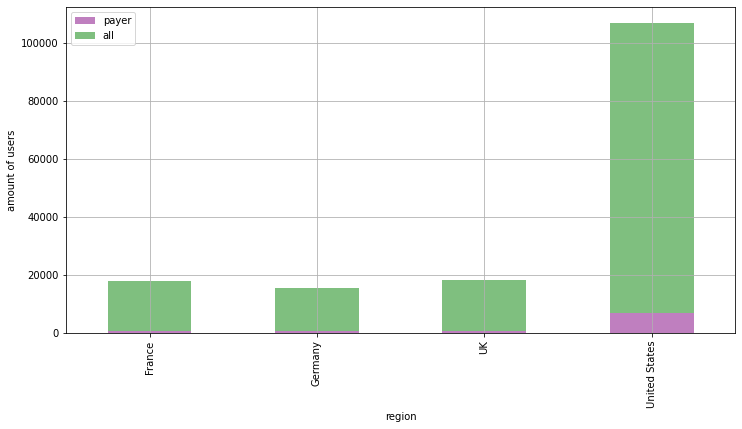

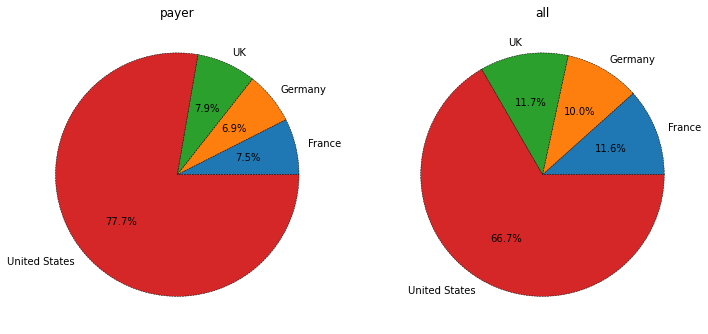

,payer,all,%
region,,,
United States,6902,100002,6.90
Germany,616,14981,4.11
UK,700,17575,3.98
France,663,17450,3.80


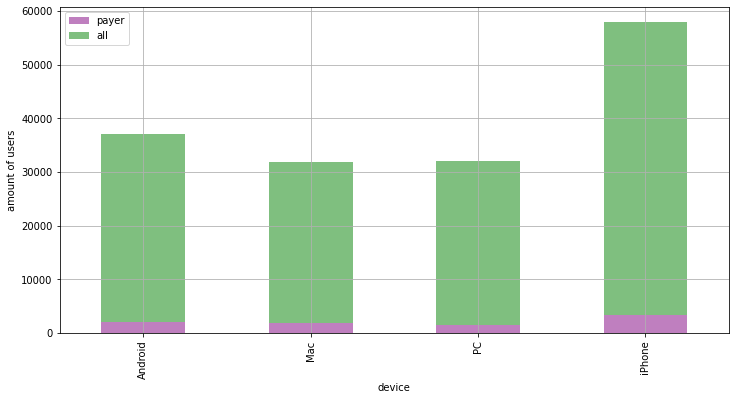

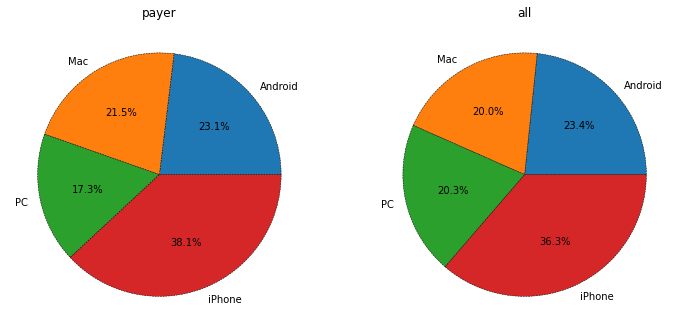

,payer,all,%
device,,,
Mac,1912,30042,6.36
iPhone,3382,54479,6.21
Android,2050,35032,5.85
PC,1537,30455,5.05


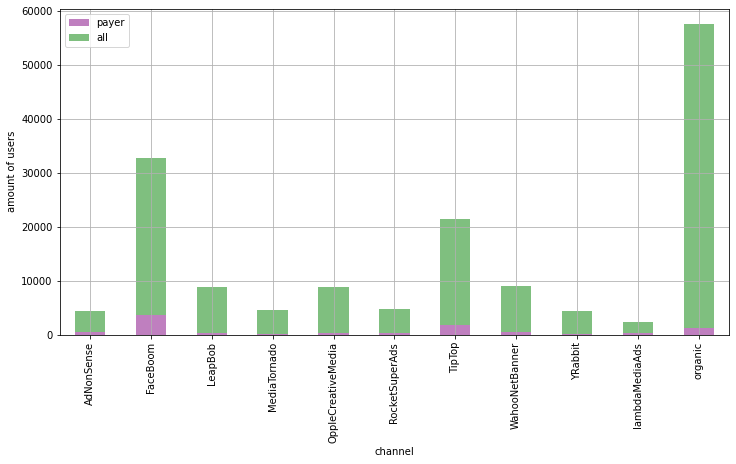

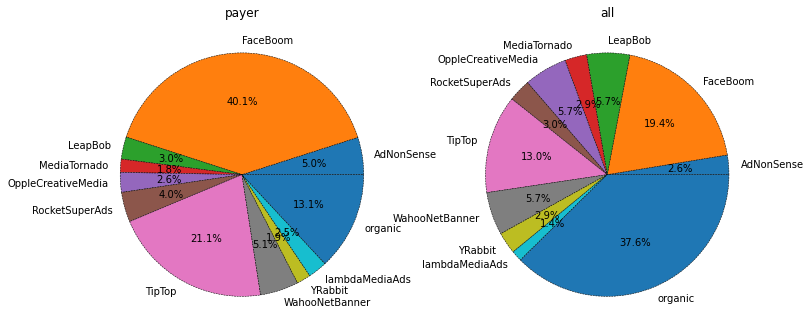

,payer,all,%
channel,,,
FaceBoom,3557,29144,12.20
AdNonSense,440,3880,11.34
lambdaMediaAds,225,2149,10.47
TipTop,1878,19561,9.60
RocketSuperAds,352,4448,7.91
WahooNetBanner,453,8553,5.30
YRabbit,165,4312,3.83
MediaTornado,156,4364,3.57
LeapBob,262,8553,3.06


In [14]:
profiles_payer = profiles.query('payer == True') # Выделяем только платящих пользователей
for i in ('region', 'device', 'channel'): # Изучаем, как отличаются доли платящих пользователей в зависимости от региона, девайса, рекламного источника
    profiles_payer_group = ((profiles_payer.groupby(i)['user_id']
                            .nunique()
                            .reset_index()
                            .merge(profiles.groupby(i)['user_id']
                                   .nunique()
                                   .reset_index(), 
                            on = i, how='left').set_index(i))
                            .rename(columns={'user_id_x':'payer', 'user_id_y':'all'}))
    profiles_payer_group.plot(kind='bar', 
                              figsize = (12,6), 
                              grid=True, stacked= True, 
                              color=['purple', 'green'], 
                              alpha = 0.5, 
                              xlabel = i, 
                              ylabel = 'amount of users');
    plt.show()
    fig, axis = plt.subplots(1, 2, figsize = (12, 6))
    axis[0].pie(profiles_payer_group['payer'], 
                autopct='%1.1f%%', 
                wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 0.5,
                      'ls':'--',
                      'antialiased': True}, 
                labels=profiles_payer_group.index.values)
    axis[0].set(title = 'payer')
    axis[1].pie(profiles_payer_group['all'], 
                autopct='%1.1f%%', 
                wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 0.5,
                      'ls':'--',
                      'antialiased': True}, 
                labels=profiles_payer_group.index.values)
    axis[1].set(title = 'all')
    plt.show()
    profiles_payer_group['%'] = round((profiles_payer_group['payer'] / profiles_payer_group['all'] * 100), 2)
    display(profiles_payer_group.sort_values(by='%', ascending=False))

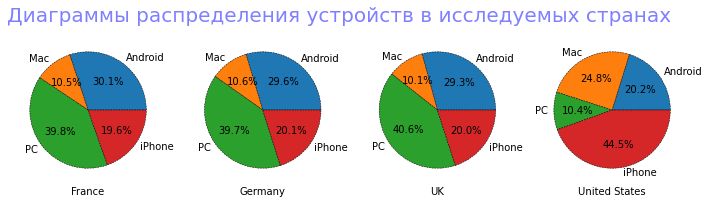

In [15]:
favorite_device=profiles.pivot_table(index='device', columns='region', values='user_id', aggfunc='nunique')
fig, axis = plt.subplots(nrows= 1 , ncols=4, figsize=(12, 3))
fig. suptitle("Диаграммы распределения устройств в исследуемых странах", fontsize=20, color="blue", alpha=0.5)
my_list = list(favorite_device.columns.values)
for col in my_list:
    axis[my_list.index(col)].pie(favorite_device[col], 
                                 autopct='%1.1f%%', 
                                 wedgeprops = {"edgecolor" : "black", 
                                               'linewidth': 0.5,
                                               'ls':'--',
                                               'antialiased': True}, 
                                 labels=favorite_device.index.values)
    axis[my_list.index(col)].set(xlabel = col)

**Вывод №2:** абсолютное большинство пользователей являются американцами, среди них также самый высокий процент платящих пользователей - 7%. Помимо этого присутствуют пользователи из Германии, Франции, Англии. Платящих пользователей из этих стран значительно меньше, в районе 4%. В будущем необходимо изучить, в связи с чем имеется этот дисбаланс.  
**Вывод №3:** больше всего в приложение приходят с устройств Iphone и Android. Однако необходимо понимать, что эти данные искажены большим количеством американских пользователей. На диаграммах распределения устройств по странам видно, что европейцы предпочитают заходить в приложение с PC или Android. Iphone и Mac произведены в Америке (менее высокие цены и более широкий функционал), в связи с чем объясняется их популярность в этой стране.   
**Вывод №4:** Больше всего в приложения приходят пользователи, которые нашли его самостоятельно. На втором месте находится канал FaceBoom, а на третьем TipTop. От FaceBoom приложение получило 12.2% платящих пользователей - это самый лучший результат среди всех каналов. TipTop принес значительно меньше, всего 9.6%. Органические пользователи ожидаемо заняли последнее место в рейтинге, набрав чуть больше 2%.

### Маркетинг

#### Расчет общей суммы расходов на маркетинг
#### Анализ трат по источникам 

Общие затраты на маркетинг = 105497.3
channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64


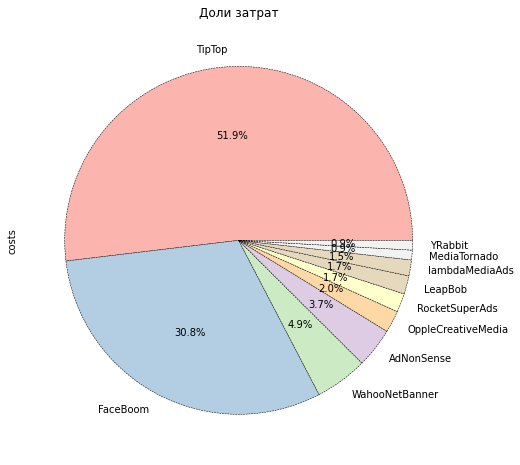

In [16]:
costs_sum = round(costs['costs'].sum(), 2)
print('Общие затраты на маркетинг =', costs_sum)
costs_group = costs.groupby('channel')['costs'].sum().sort_values(ascending=False)
print(costs_group)
costs_group.plot(kind='pie', 
                 autopct='%1.1f%%', 
                 figsize = (8,8), 
                 cmap="Pastel1", 
                 wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 0.5,
                      'ls':'--',
                      'antialiased': True})
plt.title('Доли затрат')
plt.show()

**Вывод №5:** самая большая доля трат приходится на канал TipTop. Принимая во внимание тот факт, что из этого канала приходит не так много людей, а их платежеспособность ниже по сравнению с FaceBoom, имеет смысл пересмотреть маркетинговую политику.

#### Анализ трат по времени (неделям и месяцам)

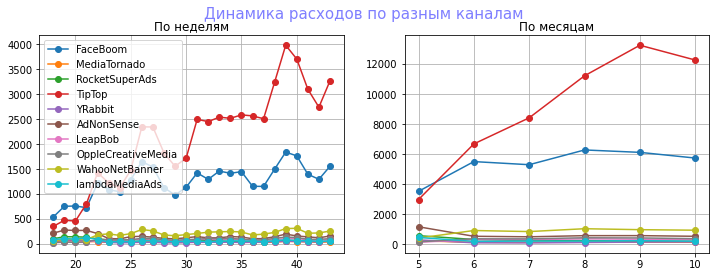

<Figure size 432x288 with 0 Axes>

In [17]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = pd.DatetimeIndex(costs['dt']).month
fig, axis = plt.subplots(nrows= 1 , ncols=2, figsize=(12, 4))
fig. suptitle("Динамика расходов по разным каналам", fontsize=15, color="blue", alpha=0.5)
plt.figure(figsize=(6, 4))
for col in costs['channel'].unique():
    costs_group_date = (costs.query('channel == @col')
                             .groupby(['week'])['costs']
                             .sum())
    axis[0].plot(costs_group_date, label=col, marker = 'o')
    axis[0].legend(loc='upper left')
axis[0].grid()
axis[0].set_title('По неделям')
for col in costs['channel'].unique():
    costs_group_date = (costs.query('channel == @col')
                             .groupby(['month'])['costs']
                             .sum())
    axis[1].plot(costs_group_date, label=col, marker = 'o')
axis[1].set_title('По месяцам')
axis[1].grid()
plt.show()

**Вывод №6:** Динамика расходов на каналы TipTop и FaceBoom растут самыми высокими темпами вплоть до сентября (39 неделя), послечего идут на спад.

#### Расчет средней стоимости привлечения одного пользователя

In [18]:
profiles=profiles.query('channel!="organic"')
print(profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False))
print("Средняя стоимость привлечения одного пользователя =", round((profiles.groupby('channel')['acquisition_cost'].mean()).mean(), 2))

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
Name: acquisition_cost, dtype: float64
Средняя стоимость привлечения одного пользователя = 0.76


In [19]:
favorite_channel=profiles.pivot_table(index='channel', columns='region', values='user_id', aggfunc='nunique').rename(columns={'United States':'United_States'}).reset_index()
favorite_channel_payer = (profiles.query('payer==True')
                          .pivot_table(index='channel', columns='region', values='user_id', aggfunc='nunique')
                          .rename(columns={'France': 'France_payer',
                                           'Germany':'Germany_payer',
                                           'UK':'UK_payer',
                                           'United States':'United_States_payer'}).reset_index())
favorite_channel = favorite_channel.merge(favorite_channel_payer)
channel_europa = favorite_channel.drop(['United_States', 'United_States_payer'], axis='columns').query('France.isna()==False')
channel_usa = favorite_channel.drop(['France', 'France_payer', 'Germany', 'Germany_payer', 'UK','UK_payer'], axis='columns').query('United_States.isna()==False')
channel_europa['France_%'] = round(channel_europa['France_payer'] / channel_europa['France'] * 100, 2)
channel_europa['Germany_%'] = round(channel_europa['Germany_payer'] / channel_europa['Germany'] * 100, 2)
channel_europa['UK_%'] = round(channel_europa['UK_payer'] / channel_europa['UK'] * 100, 2)
channel_usa['United_States_%'] = round(channel_usa['United_States_payer'] / channel_usa['United_States'] * 100, 2)
display(favorite_channel)
display(channel_europa.sort_values(by = 'France', ascending=False))
display(channel_usa.sort_values(by = 'United_States_%', ascending=False))

region,channel,France,Germany,UK,United_States,France_payer,Germany_payer,UK_payer,United_States_payer
0,AdNonSense,1366.0,1219.0,1295.0,NaN,150.0,142.0,148.0,NaN
1,FaceBoom,NaN,NaN,NaN,29144.0,NaN,NaN,NaN,3557.0
2,LeapBob,2988.0,2519.0,3046.0,NaN,90.0,69.0,103.0,NaN
3,MediaTornado,NaN,NaN,NaN,4364.0,NaN,NaN,NaN,156.0
4,OppleCreativeMedia,2991.0,2562.0,3052.0,NaN,80.0,64.0,89.0,NaN
5,RocketSuperAds,NaN,NaN,NaN,4448.0,NaN,NaN,NaN,352.0
6,TipTop,NaN,NaN,NaN,19561.0,NaN,NaN,NaN,1878.0
7,WahooNetBanner,2971.0,2579.0,3003.0,NaN,152.0,148.0,153.0,NaN
8,YRabbit,NaN,NaN,NaN,4312.0,NaN,NaN,NaN,165.0
9,lambdaMediaAds,742.0,649.0,758.0,NaN,82.0,67.0,76.0,NaN


region,channel,France,Germany,UK,France_payer,Germany_payer,UK_payer,France_%,Germany_%,UK_%
4,OppleCreativeMedia,2991.0,2562.0,3052.0,80.0,64.0,89.0,2.67,2.50,2.92
2,LeapBob,2988.0,2519.0,3046.0,90.0,69.0,103.0,3.01,2.74,3.38
7,WahooNetBanner,2971.0,2579.0,3003.0,152.0,148.0,153.0,5.12,5.74,5.09
0,AdNonSense,1366.0,1219.0,1295.0,150.0,142.0,148.0,10.98,11.65,11.43
9,lambdaMediaAds,742.0,649.0,758.0,82.0,67.0,76.0,11.05,10.32,10.03


region,channel,United_States,United_States_payer,United_States_%
1,FaceBoom,29144.0,3557.0,12.20
6,TipTop,19561.0,1878.0,9.60
5,RocketSuperAds,4448.0,352.0,7.91
8,YRabbit,4312.0,165.0,3.83
3,MediaTornado,4364.0,156.0,3.57


**Вывод №7:** интересно, что каждый регион представлен своим набором каналов, которые не пересекаются. Стоимость одного человека из канала TipTop оказалась самой дорогой на втором месте FaceBoom. Оба канала приносят только американских пользователей.  
**Вывод №8:** в Европе смешанная ситуация, с одной стороны лучшие показатели по платящим пользователям у каналов lambdaMediaAds и AdNonSense (около 10-11% в зависимости от страны), однако самое большое количество пользователей пришло от OppleCreativeMedia и LeapBob, но их показатели платящих пользователей очень низкие (не превышают 3%).

### Анализ окупаемости рекламы

#### Указание момента и горизонта анализа 

In [20]:
observation_date = datetime(2020, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

#### Общий анализ окупаемости рекламы

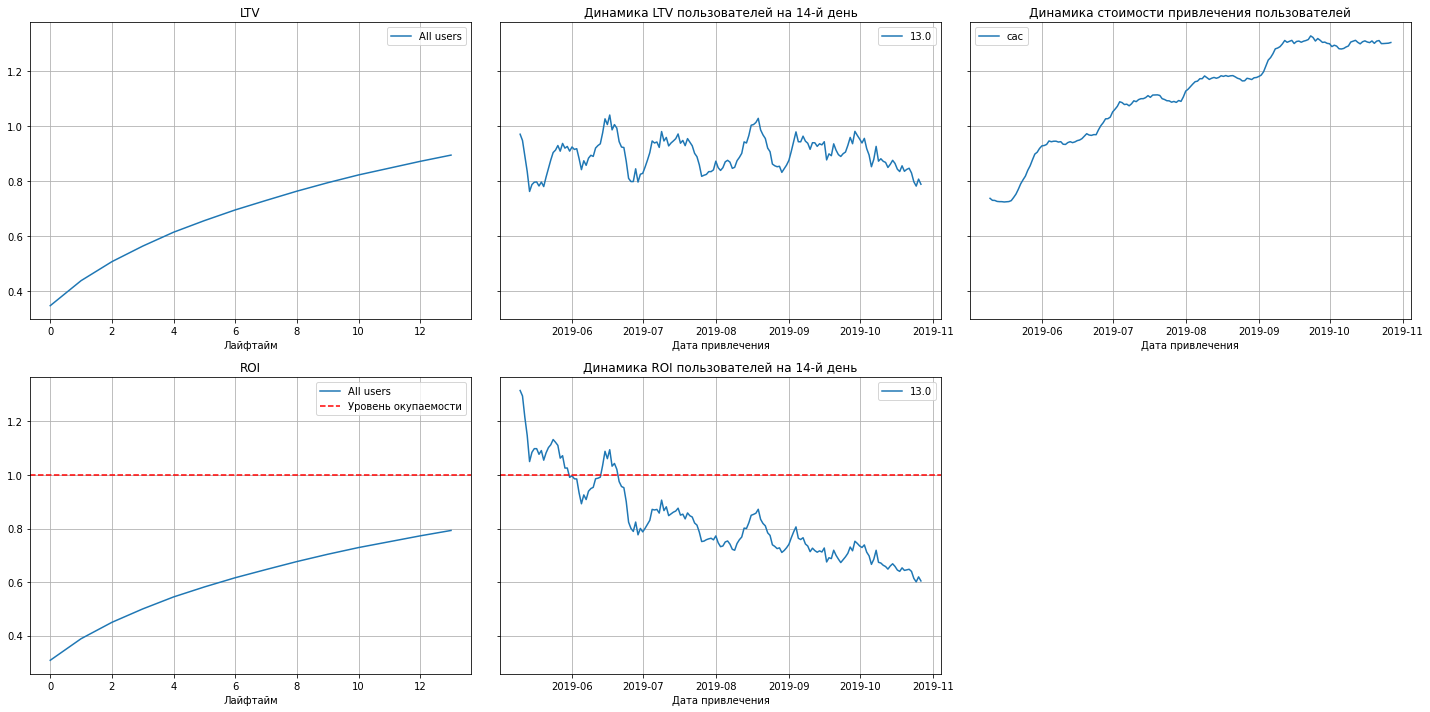

In [21]:
dimensions = [] # не указываем никакого "разделителя"

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
) #вызываем функции расчета

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=10
) #вызываем функции построения

**Вывод №9:** показатель CAC значительно вырос за выбранный временной промежуток. Показатель LTV стабилен, поэтому предварительно можно говорить о том, что проблема не в ухудшении качества пользователей. Показатель ROI достигают уровня окупаемости только на 80%, при этом в динамике он стремительно падает. Необходимо провести более детальный анализ, чтобы выявить проблему. 

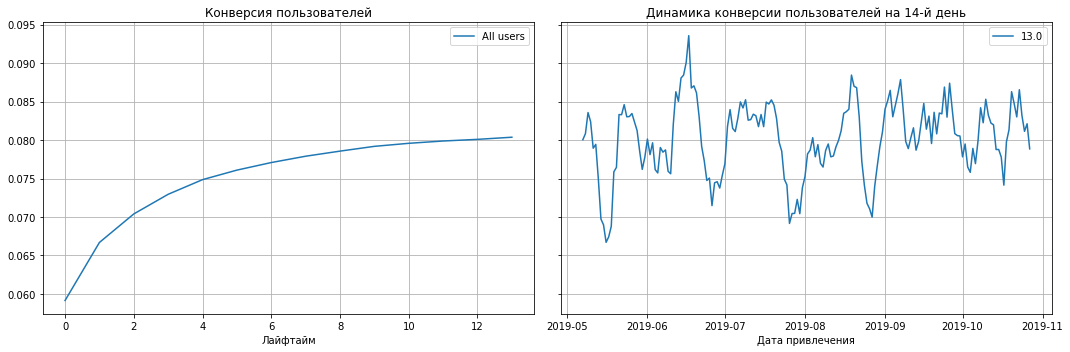

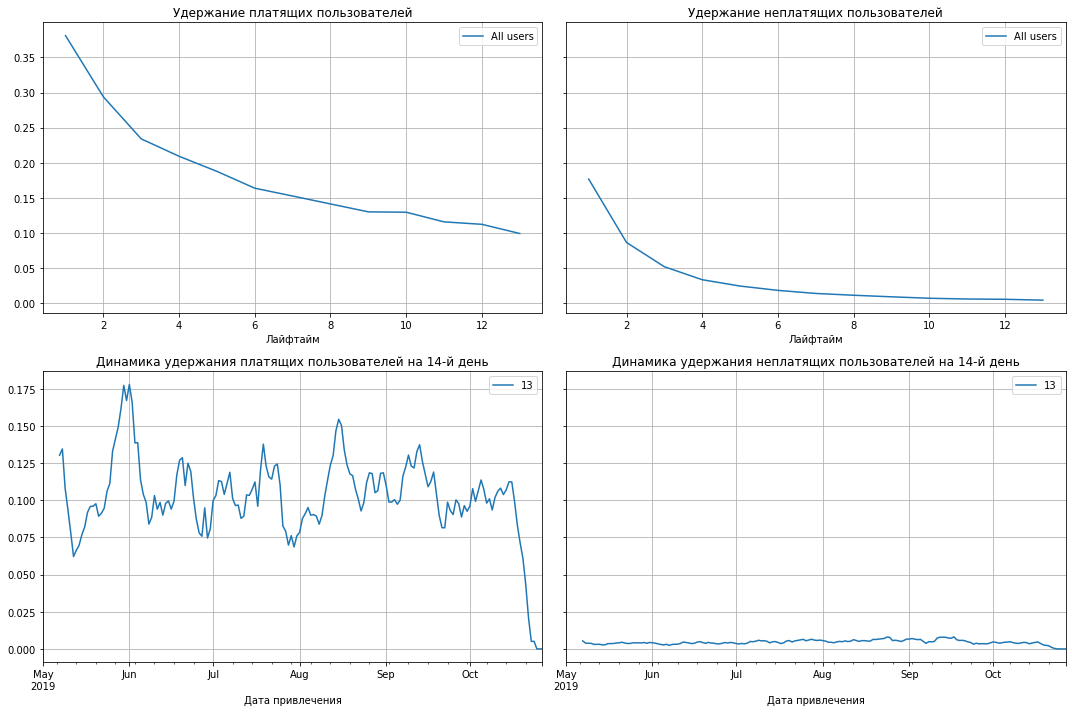

In [22]:
# смотрим конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод №10:** конверсия пользователей проходит нормально, а вот удержание пользователей проходит не очень хорошо.

#### Анализ окупаемости рекламы с разбивкой по странам

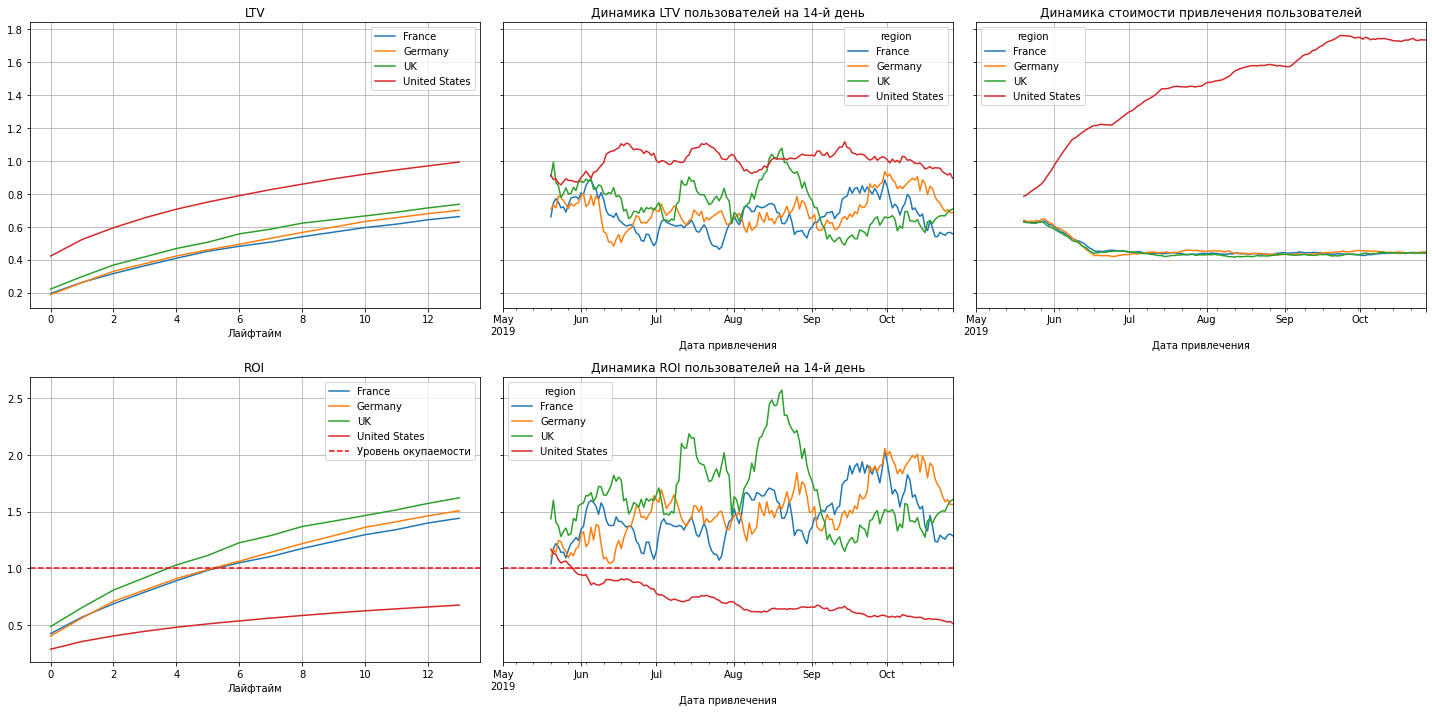

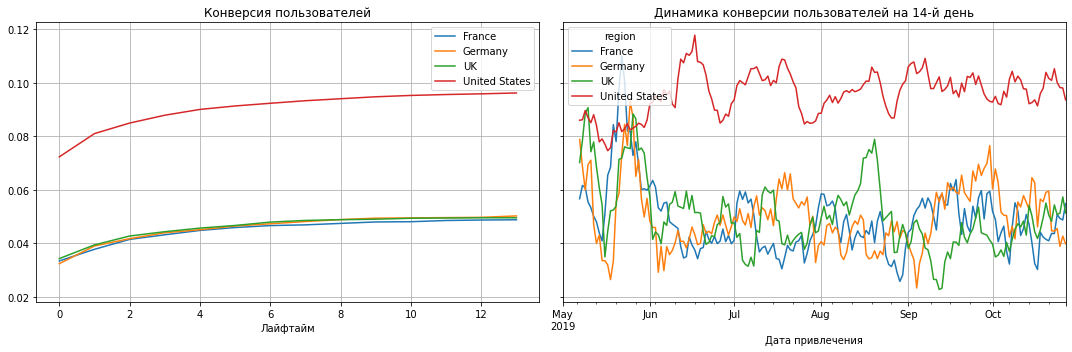

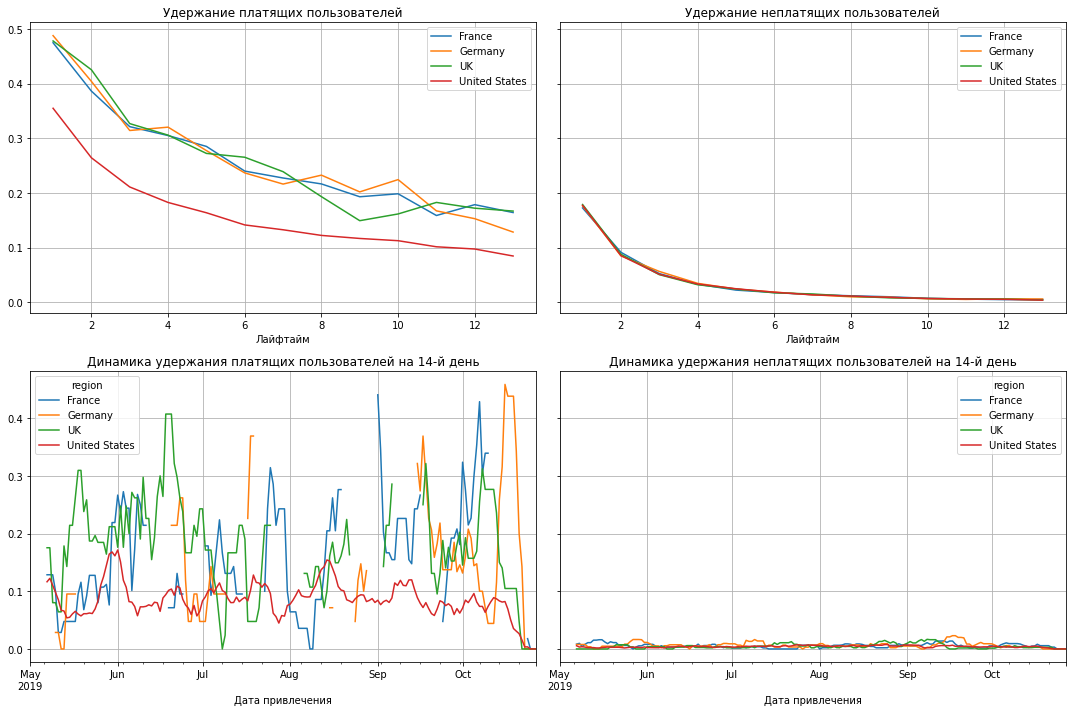

In [23]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=20
)
# смотрим конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод №11:** у США лучшие показатели LTV, конверсии, однако график динамики стоимости привлечения также пошел резко вверх, в отличии от стран Европы. В связи с этим можно объяснить резкое снижение окупаемости (показателя ROI). А также имеется проблема с удержанием пользователей.

#### Анализ окупаемости рекламы с разбивкой по рекламным каналам

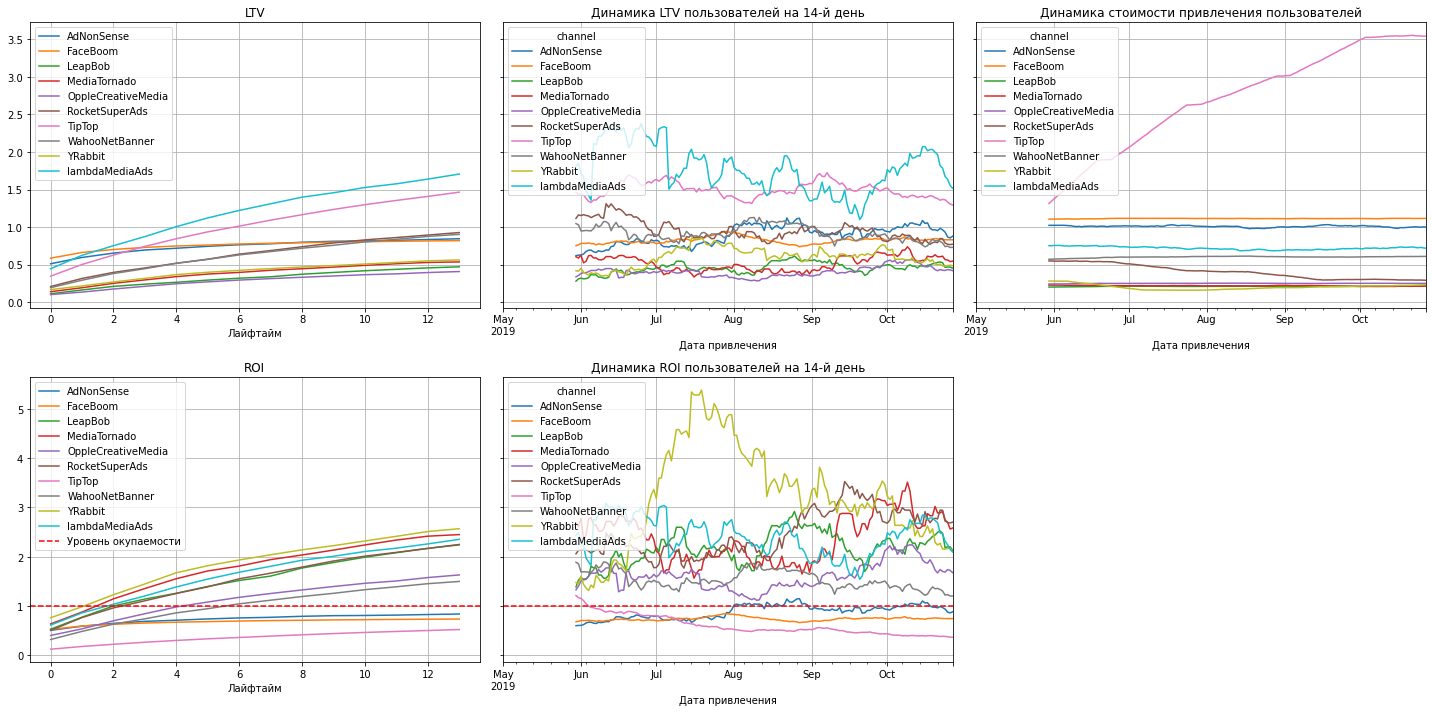

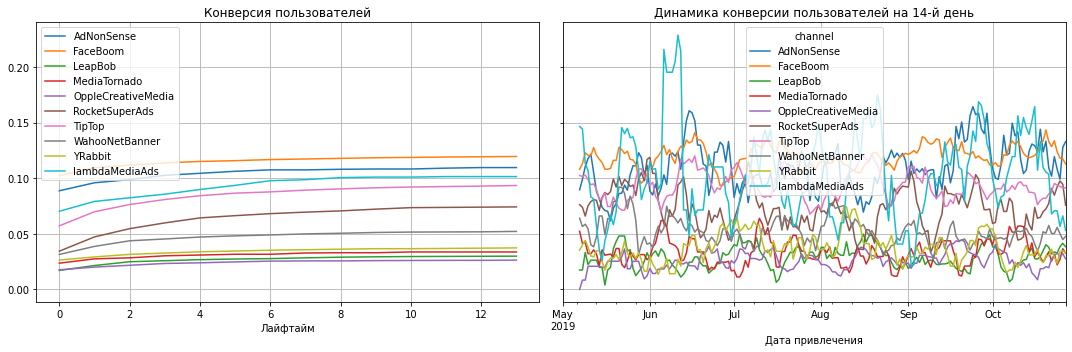

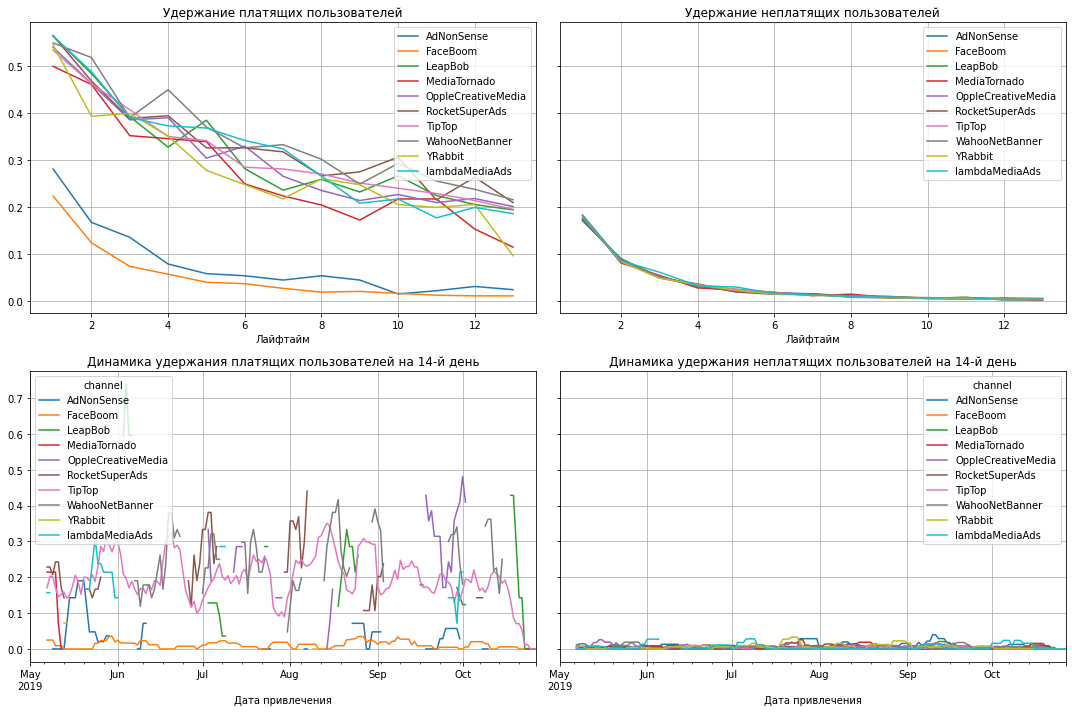

In [24]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=30
)

# смотрим конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод №12:** на графиках наблюдается высокий показатель LTV и конверсии у каналов: TipTop, lambdaMediaAds, RocketSuperAds (США).
Самая высокая стоимость у каналов:  FaceBoom, AdNonSense, TipTop, при этом у последнего динамика стоимости стремительно идет вверх, все остальные каналы имеют стабильную стоимость, а стоимость RocketSuperAds даже снижается. 
В показателе ROI самые худшие результаты также идут у FaceBoom, AdNonSense, TipTop, все три канала не пересекают уровень окупаемости. Лучшие результаты у каналов lambdaMediaAds, RocketSuperAds, YRabbit и MediaTornado.

#### Анализ окупаемости рекламы с разбивкой по устройствам

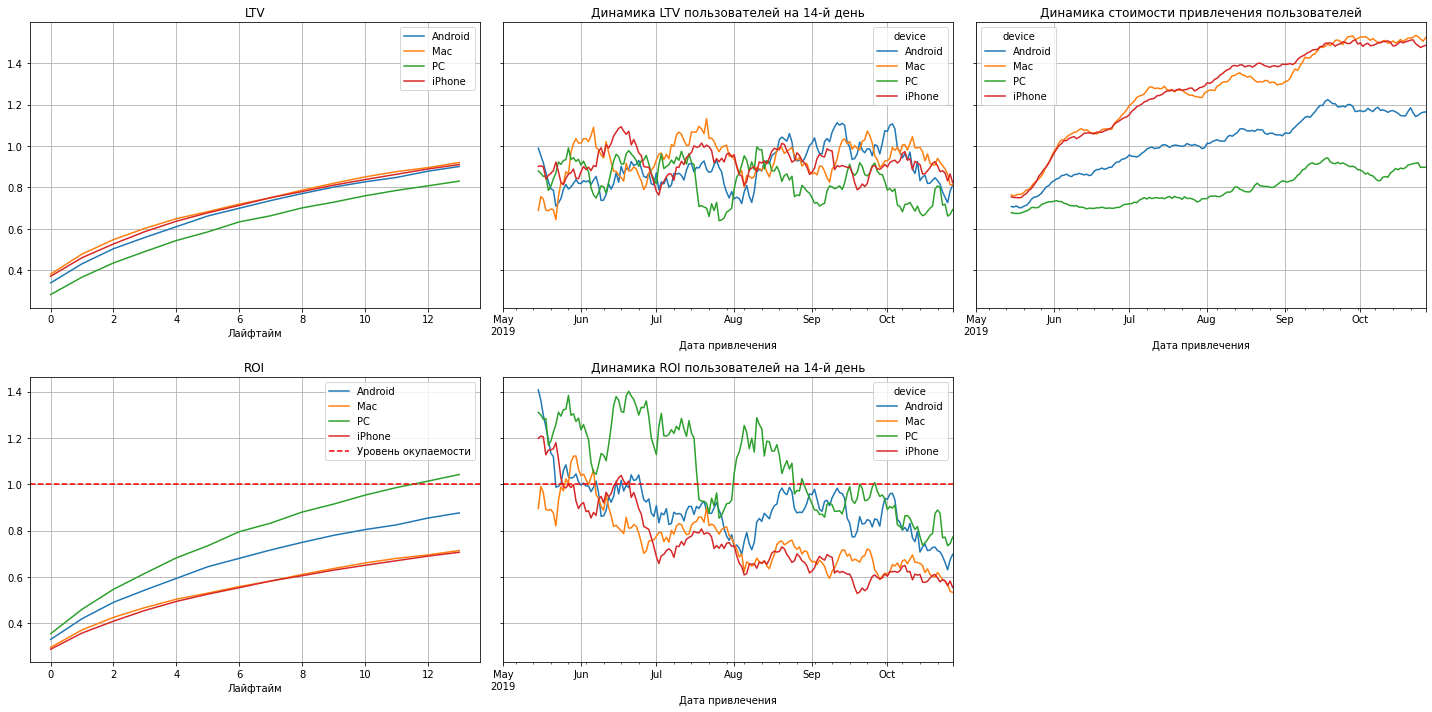

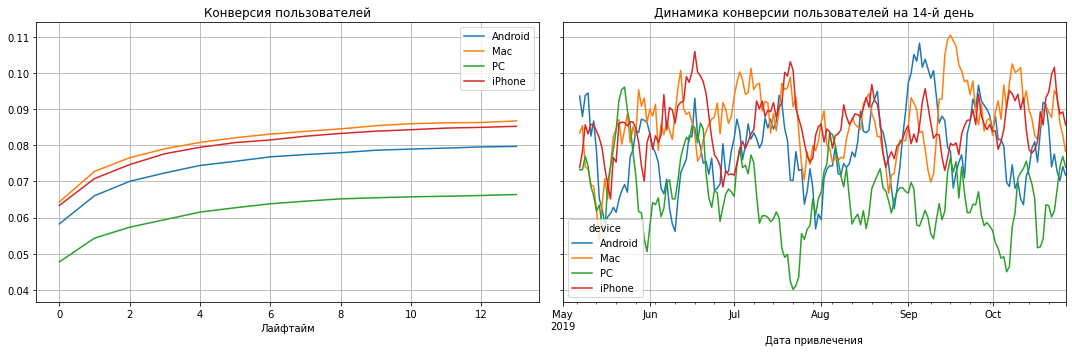

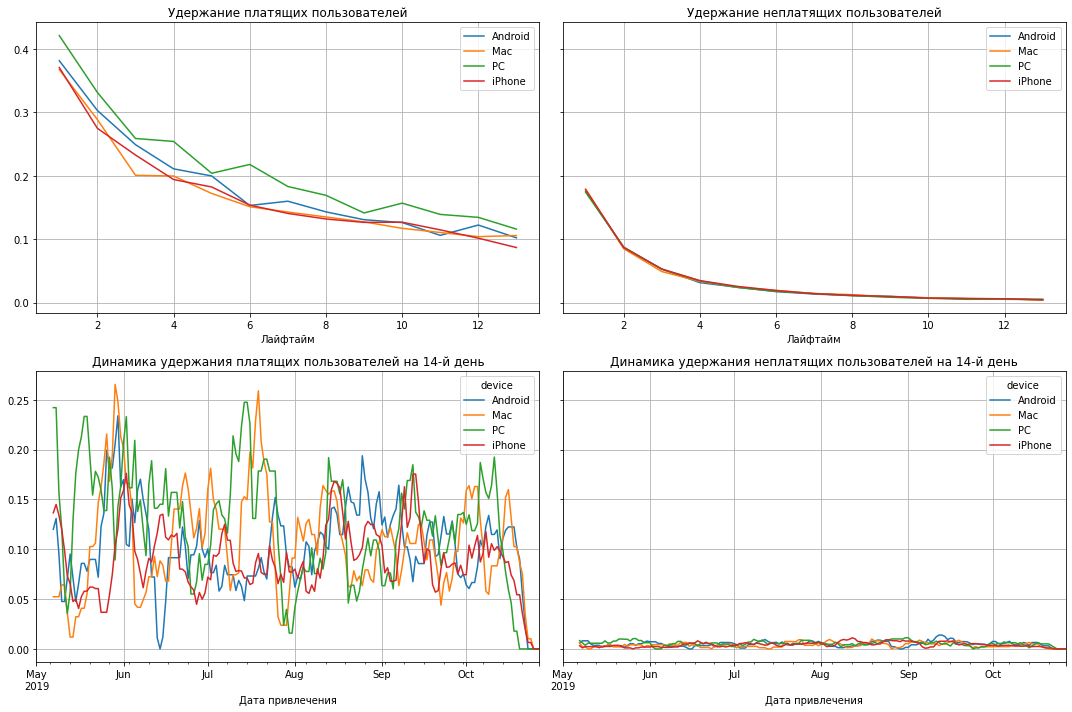

In [25]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=15
)

# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

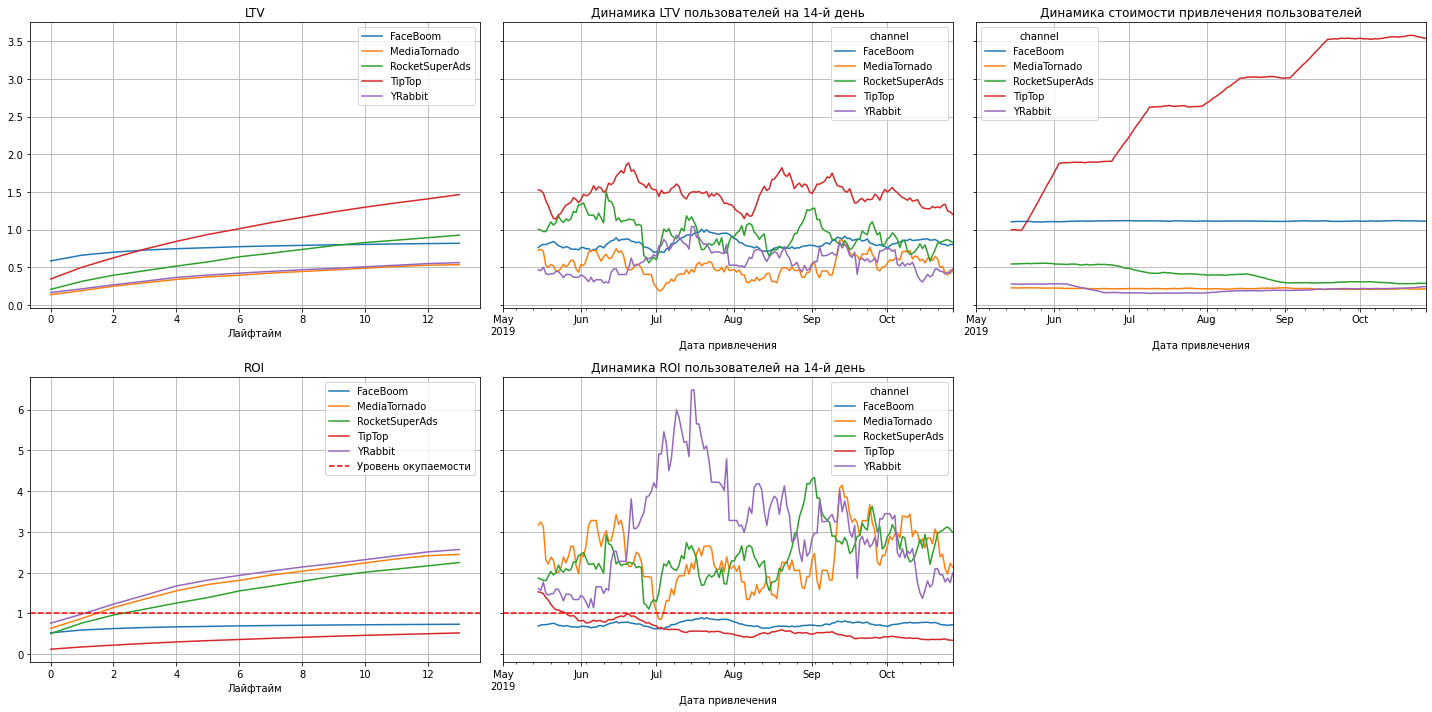

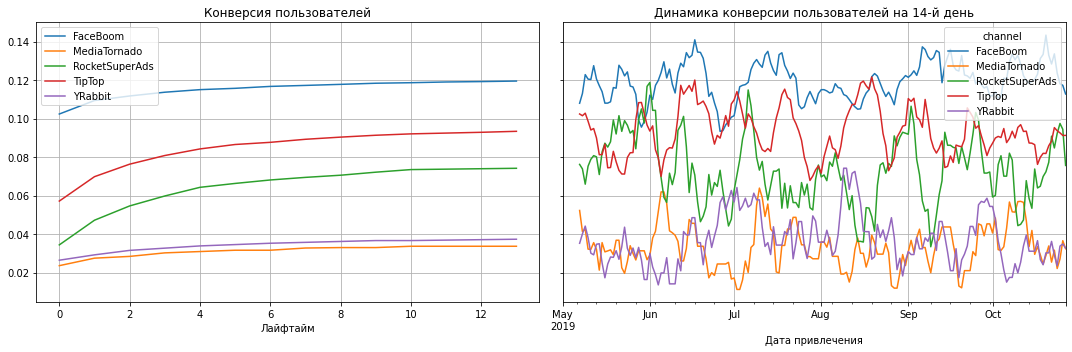

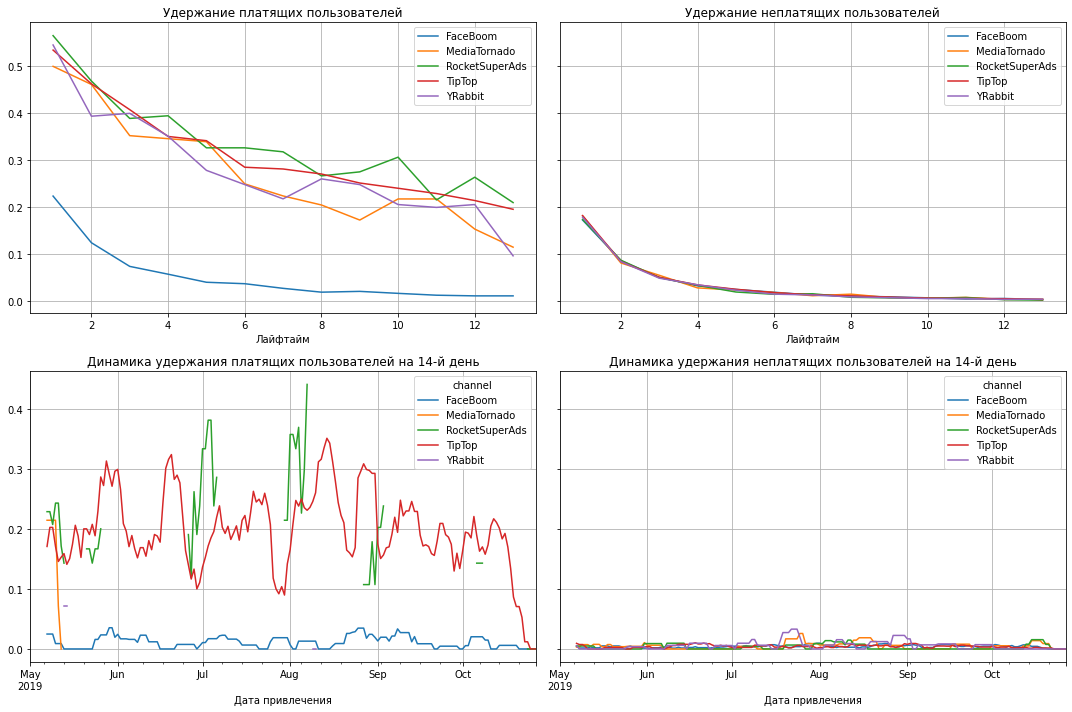

In [26]:
profiles=profiles.query('region=="United States"')
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=15
)

# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод №13:** распределение устройств по странам имеет не однородный характер, а также их влияние на привлечение пользователей, скорее, второстепенно. Большинство графиков идентичны друг другу, что потверждает данное утверждение. Однако стоит отметить, что конверсия пользователей PC значительно ниже чем у остальных платформ. Это может быть связано, как со спецификой целевой аудитории, так и с техническими сбоями, необходим более детальный анализ. Все остальные графики скорее связаны со страной, где распространены устройства, а не с самими устройствами непосредственно.  

**Ответы на вопросы: **
1. Реклама, направленная на привлечение пользователей в целом НЕ ОКУПАЕТСЯ.   
2. 
   + *Устройства*: хотя утройства распределены не равномерно (в США более представлены продукты компании Apple), они не оказывают значительного негативного влияния на привлечение пользователей.
   + *Каналы*: FaceBoom, TipTop (в США), AdNonSense (В Европе) не окупаются. На них уходит суммарно около 86% всех ресурсов, необходимо срочно вносить корректировки в рекламный бюджет.
   + *Регион*: показатели пользовалетей из США выше, чем показатели пользователей из Европы, это может быть связано с целым рядом причин, например: финансовые возможнонсти жителей разных стран, необходимость приложения в данном регионе и т.д. Для ответа на этот вопрос необходим более глубокий анализ. 
3.  Основные проблемы:  
    + Возросшие траты на бюджет из-за повышения цен на привлечение новых пользователей в компании TipTop.  
    + Вкадывание самой большой доли средств в самый дорогой и неокупающий себя канал.

### Выводы

**Вывод №0:** в данных присутствовали: не верный тип данных, отсутствие приведения к змеиному регистру.  
Над данными были проведены следующие действия: 
1. Столбцы с датой и временем были приведены к нужному типу;
2. Названия столбцов были приведены к змеиному регистру.   
Пропуски и дубликаты не найдены. 

**Вывод №1:** основной промежуток привлечения клиентов представленных в данном исследовании находится в пределах от 2019-05-01 00:00:41 до 2019-10-27 23:59:04.

**Вывод №2:** абсолютное большинство пользователей являются американцами, среди них также самый высокий процент платящих пользователей - 7%. Помимо этого присутствуют пользователи из Германии, Франции, Англии. Платящих пользователей из этих стран значительно меньше, в районе 4%. В будущем необходимо изучить, в связи с чем имеется этот дисбаланс.  

**Вывод №3:** больше всего в приложение приходят с устройств Iphone и Android. Однако необходимо понимать, что эти данные искажены большим количеством американских пользователей. На диаграммах распределения устройств по странам видно, что европейцы предпочитают заходить в приложение с PC или Android. Iphone и Mac произведены в Америке (менее высокие цены и более широкий функционал), в связи с чем объясняется их популярность в этой стране.   

**Вывод №4:** Больше всего в приложения приходят пользователи, которые нашли его самостоятельно. На втором месте находится канал FaceBoom, а на третьем TipTop. От FaceBoom приложение получило 12.2% платящих пользователей - это самый лучший результат среди всех каналов. TipTop принес значительно меньше, всего 9.6%. Органические пользователи ожидаемо заняли последнее место в рейтинге, набрав чуть больше 2%.

**Вывод №5:** самая большая доля трат приходится на канал TipTop. Принимая во внимание тот факт, что из этого канала приходит не так много людей, а их платежеспособность ниже по сравнению с FaceBoom, имеет смысл пересмотреть маркетинговую политику.

**Вывод №6:** Динамика расходов на каналы TipTop и FaceBoom растут самыми высокими темпами вплоть до сентября (39 неделя), послечего идут на спад.

**Вывод №7:** интересно, что каждый регион представлен своим набором каналов, которые не пересекаются. Стоимость одного человека из канала TipTop оказалась самой дорогой на втором месте FaceBoom. Оба канала приносят только американских пользователей. 

**Вывод №8:** в Европе смешанная ситуация, с одной стороны лучшие показатели по платящим пользователям у каналов lambdaMediaAds и AdNonSense (около 10-11% в зависимости от страны), однако самое большое количество пользователей пришло от OppleCreativeMedia и LeapBob, но их показатели платящих пользователей очень низкие (не превышают 3%).

**Вывод №9:** показатель CAC значительно вырос за выбранный временной промежуток. Показатель LTV стабилен, поэтому предварительно можно говорить о том, что проблема не в ухудшении качества пользователей. Показатель ROI не достигает уровня окупаемости, при этом в динамике он стремительно падает. Необходимо провести более детальный анализ, чтобы выявить проблему. 

**Вывод №10:** конверсия пользователей проходит нормально, а вот удержание пользователей проходит не очень хорошо.

**Вывод №11:** у США лучшие показатели LTV, конверсии, однако график динамики стоимости привлечения также пошел резко вверх, в отличии от стран Европы. В связи с этим можно объяснить резкое снижение окупаемости (показателя ROI). А также имеется проблема с удержанием пользователей.

**Вывод №12:** на графиках наблюдается высокий показатель LTV и конверсии у каналов: TipTop, lambdaMediaAds, RocketSuperAds (США). Самая высокая стоимость у каналов: FaceBoom, AdNonSense, TipTop, при этом у последнего динамика стоимости стремительно идет вверх, все остальные каналы имеют стабильную стоимость, а стоимость RocketSuperAds даже снижается. В показателе ROI самые худшие результаты также идут у FaceBoom, AdNonSense, TipTop, все три канала не пересекают уровень окупаемости. Лучшие результаты у каналов lambdaMediaAds, RocketSuperAds, YRabbit и MediaTornado.

**Вывод №13:** распределение устройств по странам имеет не однородный характер, а также их влияние на привлечение пользователей, скорее, второстепенно. Большинство графиков идентичны друг другу, что потверждает данное утверждение. Однако стоит отметить, что конверсия пользователей PC значительно ниже чем у остальных платформ. Это может быть связано, как со спецификой целевой аудитории, так и с техническими сбоями, необходим более детальный анализ. Все остальные графики скорее связаны со страной, где распространены устройства, а не с самими устройствами непосредственно. 

**Ответы на вопросы: **
1. Реклама, направленная на привлечение пользователей в целом НЕ ОКУПАЕТСЯ (80%).   
2. 
   + *Устройства*: хотя утройства распределены не равномерно (в США более представлены продукты компании Apple), они не оказывают значительного негативного влияния на привлечение пользователей.
   + *Каналы*: FaceBoom, TipTop (в США), AdNonSense (В Европе) не окупаются. На них уходит суммарно около 86% всех ресурсов, необходимо срочно вносить корректировки в рекламный бюджет.
   + *Регион*: показатели пользовалетей из США выше, чем показатели пользователей из Европы, это может быть связано с целым рядом причин, например: финансовые возможнонсти жителей разных стран, необходимость приложения в данном регионе и т.д. Для ответа на этот вопрос необходим более глубокий анализ. 
3.  Основные проблемы:  
    + Возросшие траты на бюджет из-за повышения цен на привлечение новых пользователей в компании TipTop.  
    + Вкадывание самой большой доли средств в самый дорогой и неокупающий себя канал.

**Общий вывод и рекомендации в отделу маркетинга:** 

**Цель выполнена:** был проведен анализ полученных датасетов, выявлены негативные явления, влияющие на качество привлечения новых пользователей в приложение, выработаны рекомендации по их устранению, выполнены все поставленные задачи.

**Общий вывод:** Основная доля пользователей приложения приходит из США, также география представлена еще четырмя европейскими странами: Франция Германия и Англия их показатели практически не отличаются, поэтому объединим их в понятие "Европа". Американцы являются более платежеспособными пользователями (7%), чем европейцы (3%). Европейцы предпочитают заходить в приложение с PC или Android, американцы с Iphone и Mac. Каждый регион представлен своим набором каналов привлечения, которые не пересекаются.   
**Реклама, направленная на привлечение пользователей в целом *НЕ ОКУПАЕТСЯ* на 3 каналах из 11.**  
Несмотря на высокие показатели платящих пользователей каналы FaceBoom, TipTop (в США), AdNonSense (В Европе) не окупаются. Это напрямую связано с повышением стоимости услуг TipTop (на протяжении всего изучаемого периода) и изначально высокой ценой услуг FaceBoom и AdNonSense, помимо этого у них низкие показатели удержания пользователей. На них уходит суммарно около 86% всех ресурсов.   
**Рекомендации:** 

Приоритетно: необходимо внести корректировки в рекламный бюджет, перераспределить средства с каналов FaceBoom, TipTop, AdNonSense на каналы lambdaMediaAds (Европа) и RocketSuperAds (США), т.к. их показатели ROI, LTV, конверсии, удержания и CAC в совокупности показывают лучший результат (однако необходимо понимать, что через канал lambdaMediaAds пришло намного меньше пользователей, поэтому данные цифры могут быть искажены недостаточным количеством информации для подведения статистики).

Не приоритетно: ознакомиться с причинами более низкой вовлеченности PC пользователей. Возможно, имеет место быть технические сложности при использовании приложения.